In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os
pd.set_option('display.max_row',200)
pd.set_option('display.max_column',200)

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns; sns.set(rc={'figure.figsize':(11.7,8.27)}); sns.set_context('talk')
import matplotlib.pyplot as plt

In [3]:
from edfreader import read_edf
from pupil_preprocess import *

In [4]:
# read raw data
path = 'data/_Forced_Response_scene_contrast_2022_Jul_26_1425.asc'
data = read_edf(path, start='free fixation start')
data = pd.DataFrame(data)

In [5]:
# raw samples
samps = extract_events(data, 'samps')
samps

,time,trackertime,x,y,size
0,1.0,525552.0,774.6,628.7,7175.0
1,3.0,525554.0,774.5,628.9,7173.0
2,5.0,525556.0,774.4,628.5,7172.0
3,7.0,525558.0,774.3,628.2,7172.0
4,9.0,525560.0,774.1,628.0,7171.0
...,...,...,...,...,...
19978,39957.0,565508.0,776.3,627.1,7610.0
19979,39959.0,565510.0,775.9,626.8,7610.0
19980,39961.0,565512.0,775.7,626.9,7610.0
19981,39963.0,565514.0,776.2,627.0,7603.0


In [6]:
# fixations
fixations = extract_events(data, 'Efix')
fixations

,starttime,endtime,duration,endx,endy
0,525038.0,525948.0,912.0,773.7,622.0
1,526130.0,526354.0,226.0,746.8,609.3
2,526364.0,527566.0,1204.0,770.7,603.1
3,527596.0,527756.0,162.0,866.0,731.0
4,527782.0,527992.0,212.0,791.5,589.7
5,528036.0,528164.0,130.0,858.6,931.4
6,528176.0,529012.0,838.0,876.7,855.4
7,529046.0,533504.0,4460.0,783.4,621.7
8,533534.0,533614.0,82.0,673.6,526.8
9,533648.0,533834.0,188.0,510.4,451.0


In [7]:
# saccades
saccades = extract_events(data, 'Esac')
saccades

,starttime,endtime,duration,startx,starty,endx,endy
0,525950.0,526128.0,180.0,769.8,604.8,737.8,555.8
1,526356.0,526362.0,8.0,748.1,607.0,768.4,604.5
2,527568.0,527594.0,28.0,774.6,608.7,868.3,715.9
3,527758.0,527780.0,24.0,861.3,729.1,804.3,613.4
4,527994.0,528034.0,42.0,792.3,591.4,863.3,932.6
5,528166.0,528174.0,10.0,858.1,921.7,860.4,893.2
6,529014.0,529044.0,32.0,882.7,841.1,795.8,635.4
7,533506.0,533532.0,28.0,782.4,610.3,704.5,546.4
8,533616.0,533646.0,32.0,669.9,525.9,517.6,447.6
9,533836.0,533854.0,20.0,507.4,451.9,442.2,425.8


In [8]:
# blinks
blinks = extract_events(data, 'Eblk')
blinks

,starttime,endtime,duration
0,525974.0,526082.0,110.0
1,537342.0,537388.0,48.0
2,544680.0,544720.0,42.0
3,545826.0,546090.0,266.0
4,555254.0,555260.0,8.0
5,562854.0,563128.0,276.0


In [9]:
# msgs
msgs = extract_events(data, 'msg')
# some cleaning is needed
msgs[['block_name','routine','event','block_id','trial_id']] = msgs.message.str.split(' ',expand=True)
msgs.drop('message',inplace=True, axis=1)
msgs.trial_id = msgs.trial_id.apply(lambda x: x[:-1])
msgs = msgs.pivot(index=['block_name','block_id','trial_id','routine'], columns='event', values='trackertime')
msgs.columns = ['endtime','starttime']
msgs = msgs.reset_index()
msgs

,block_name,block_id,trial_id,routine,endtime,starttime
0,free,Block_0,Trial_0,fixation,527101,525551
1,free,Block_0,Trial_0,search,528853,527175
2,free,Block_0,Trial_1,fixation,533118,532102
3,free,Block_0,Trial_1,search,538133,533178
4,free,Block_0,Trial_2,fixation,542402,541387
5,free,Block_0,Trial_2,search,545338,542440
6,free,Block_0,Trial_3,fixation,549602,548588
7,free,Block_0,Trial_3,search,554618,549659
8,free,Block_0,Trial_4,fixation,558886,557871
9,free,Block_0,Trial_4,search,562272,558946


In [10]:
# annotate trial info
samps = borrow_events(samps, msgs, ['block_id','trial_id','routine'])
#samps = samps.dropna().reset_index()
samps

,time,trackertime,x,y,size,block_id,trial_id,routine
0,1.0,525552.0,774.6,628.7,7175.0,Block_0,Trial_0,fixation
1,3.0,525554.0,774.5,628.9,7173.0,Block_0,Trial_0,fixation
2,5.0,525556.0,774.4,628.5,7172.0,Block_0,Trial_0,fixation
3,7.0,525558.0,774.3,628.2,7172.0,Block_0,Trial_0,fixation
4,9.0,525560.0,774.1,628.0,7171.0,Block_0,Trial_0,fixation
...,...,...,...,...,...,...,...,...
19978,39957.0,565508.0,776.3,627.1,7610.0,NaN,NaN,NaN
19979,39959.0,565510.0,775.9,626.8,7610.0,NaN,NaN,NaN
19980,39961.0,565512.0,775.7,626.9,7610.0,NaN,NaN,NaN
19981,39963.0,565514.0,776.2,627.0,7603.0,NaN,NaN,NaN


In [11]:
# deblink
samps = deblink_pupil(samps, 'size', 500)

# remove outliers
samps = remove_outliers(samps, column_pup='size_deblink', column_x='x', column_y='y', top=0, left=0, right=1600, bottom=1400)

# smoothing
samps = smooth_pupil(samps, column='size_deblink_rm', window=50)

# interpolating
samps = interpolate_pupil(samps, 'size_deblink_rm_smooth', method = 'linear')
samps

,time,trackertime,x,y,size,block_id,trial_id,routine,size_deblink,size_deblink_rm,size_deblink_rm_smooth,size_deblink_rm_smooth_interp
0,1.0,525552.0,774.6,628.7,7175.0,Block_0,Trial_0,fixation,7175.0,7175.0,NaN,7123.541394
1,3.0,525554.0,774.5,628.9,7173.0,Block_0,Trial_0,fixation,7173.0,7173.0,NaN,7123.541394
2,5.0,525556.0,774.4,628.5,7172.0,Block_0,Trial_0,fixation,7172.0,7172.0,NaN,7123.541394
3,7.0,525558.0,774.3,628.2,7172.0,Block_0,Trial_0,fixation,7172.0,7172.0,NaN,7123.541394
4,9.0,525560.0,774.1,628.0,7171.0,Block_0,Trial_0,fixation,7171.0,7171.0,NaN,7123.541394
...,...,...,...,...,...,...,...,...,...,...,...,...
19978,39957.0,565508.0,776.3,627.1,7610.0,NaN,NaN,NaN,7610.0,7610.0,7611.089696,7611.089696
19979,39959.0,565510.0,775.9,626.8,7610.0,NaN,NaN,NaN,7610.0,7610.0,7610.539941,7610.539941
19980,39961.0,565512.0,775.7,626.9,7610.0,NaN,NaN,NaN,7610.0,7610.0,7610.013155,7610.013155
19981,39963.0,565514.0,776.2,627.0,7603.0,NaN,NaN,NaN,7603.0,7603.0,7609.513632,7609.513632


In [12]:
# baseline correction
def do_baseline_correction(trial_data, pup_col, time_col, method='subtractive'):
    e = trial_data[trial_data.routine=='fixation'].trackertime.values[-1]
    s = e-1000
    #print(s,e)
    df = baseline_correction(trial_data, pup_col=pup_col, time_col=time_col, baseline_range=(s,e), method=method)
    return df

samps = samps.dropna(subset='routine') # remove data not in a trial
samps = samps.groupby(['block_id','trial_id']).apply(do_baseline_correction, pup_col='size_deblink_rm_smooth_interp', time_col='trackertime')

<AxesSubplot:xlabel='time', ylabel='size_deblink_rm_smooth_interp_bsl'>

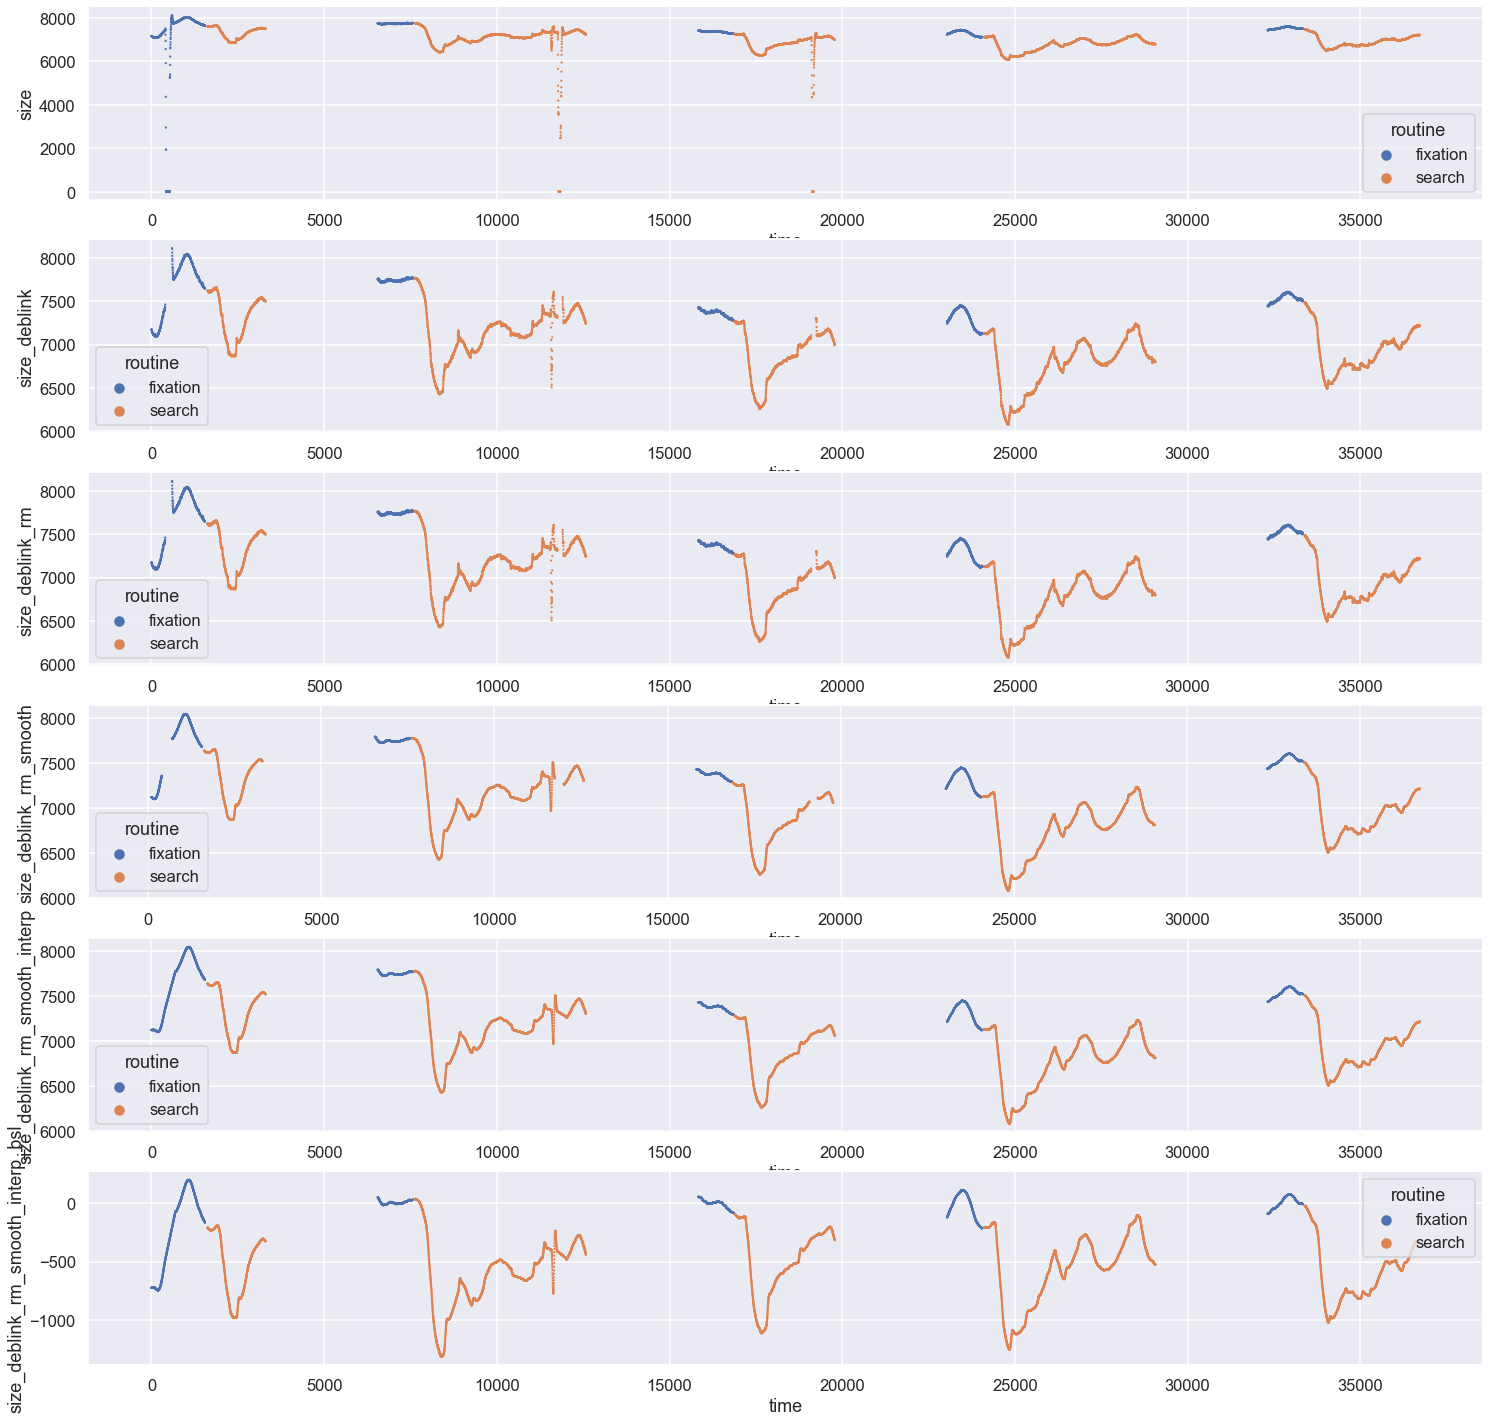

In [16]:
# plot all pupil sizes
fig, ax = plt.subplots(6,1, figsize=(25,25))
sns.scatterplot(x='time', y='size', hue='routine', data=samps, s=5,linewidth=0, ax=ax[0])
sns.scatterplot(x='time', y='size_deblink', hue='routine', data=samps, s=5,linewidth=0, ax=ax[1])
sns.scatterplot(x='time', y='size_deblink_rm', hue='routine', data=samps, s=5,linewidth=0, ax=ax[2])
sns.scatterplot(x='time', y='size_deblink_rm_smooth', hue='routine', data=samps, s=5,linewidth=0, ax=ax[3])
sns.scatterplot(x='time', y='size_deblink_rm_smooth_interp', hue='routine', data=samps, s=5,linewidth=0, ax=ax[4])
sns.scatterplot(x='time', y='size_deblink_rm_smooth_interp_bsl', hue='routine', data=samps, s=5,linewidth=0, ax=ax[5])